In [1]:
import argparse
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [2]:
epoch_re = re.compile(r"epoch\s*:\s*(\d+)")
loss_re = re.compile(r"loss\s*:\s*([0-9\.eE+-]+)")
val_loss_re = re.compile(r"val_loss\s*:\s*([0-9\.eE+-]+)")

In [6]:
def visualize_plot(log_path):
	epochs = []
	losses = []
	val_losses = []

	with open(log_path, "r") as f:
		lines = f.readlines()

	i = 0
	while i < len(lines):
		line = lines[i]
		epoch_match = epoch_re.search(line)
		if epoch_match:
			epoch = int(epoch_match.group(1))
			# Buscar las siguientes líneas para loss y val_loss
			loss = None
			val_loss = None
			for j in range(1, 10):  # Buscar en las siguientes 10 líneas
				if i + j < len(lines):
					l2 = lines[i + j]
					if loss is None:
						m = loss_re.search(l2)
						if m:
							loss = float(m.group(1))
					if val_loss is None:
						m = val_loss_re.search(l2)
						if m:
							val_loss = float(m.group(1))
				if loss is not None and val_loss is not None:
					break
			if loss is not None and val_loss is not None:
				epochs.append(epoch)
				losses.append(loss)
				val_losses.append(val_loss)
		i += 1

	# Suavizado con filtro gaussiano
	losses_smooth = gaussian_filter1d(losses, sigma=1)
	val_losses_smooth = gaussian_filter1d(val_losses, sigma=1)

	plt.figure(figsize=(10,6))
	plt.plot(epochs, losses, 'o-', alpha=0.3, label="Loss (raw)")
	plt.plot(epochs, val_losses, 'o-', alpha=0.3, label="Val Loss (raw)")
	plt.plot(epochs, losses_smooth, '-', linewidth=2, label="Loss (smoothed)")
	plt.plot(epochs, val_losses_smooth, '-', linewidth=2, label="Val Loss (smoothed)")
	plt.xlabel("Época")
	plt.ylabel("Loss")
	plt.title("Entrenamiento/Validación")
	plt.legend()
	plt.grid(True)
	plt.tight_layout()
	plt.show()

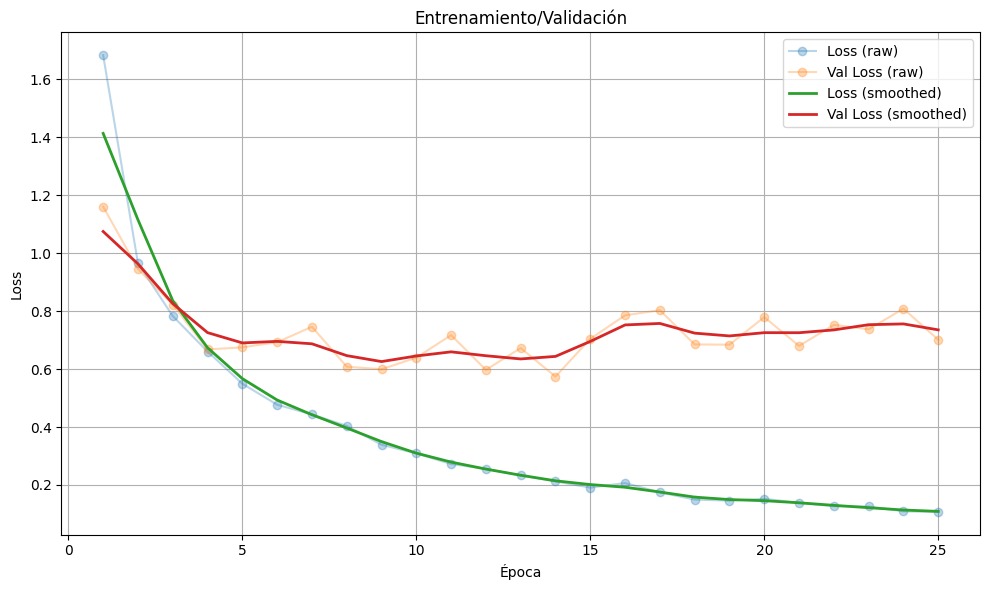

In [7]:
visualize_plot("saved/log/fCRP-prostate/0602_213033/info.log")

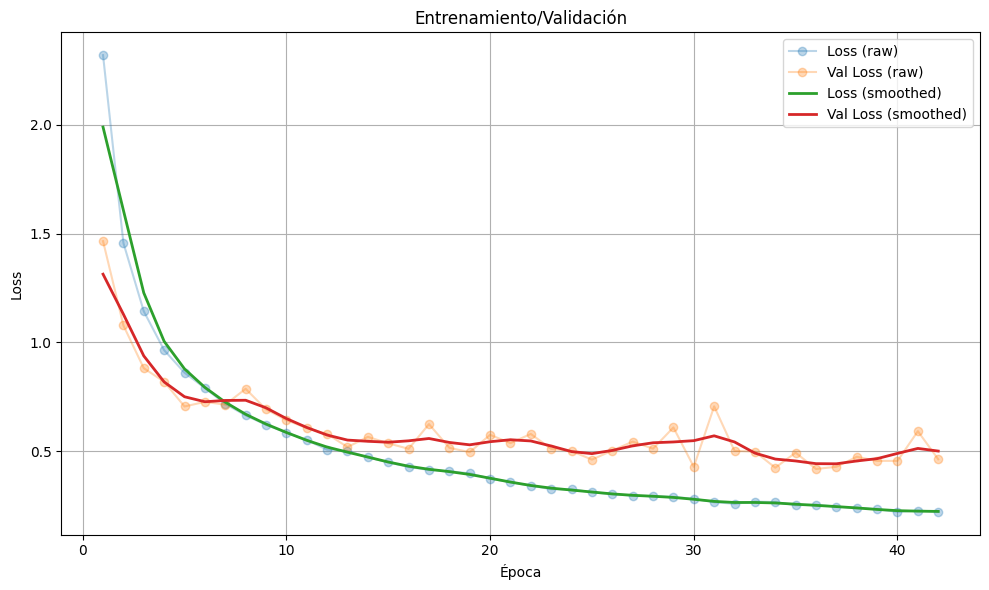

In [8]:
visualize_plot("saved/log/xMI-Efficient/0527_132703/info.log")